In [1]:
import matplotlib
import jsonlines
import sys
from pathlib import Path
sys.path.append('../src/')

from utils import benchmark
from utils import iterate_bru_args
from utils import BenchmarkResult

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_steps(filename: Path, prefix: str) -> np.array:
    with jsonlines.open(filename) as dataset:
        label = f"avg_{prefix}_step"
        xs = [data[label] for data in dataset if data[label] is not None]
    return np.array(xs)

In [3]:
data = {}
for bru_args in iterate_bru_args():
    label = "-".join([e.value for e in bru_args.values()])
    print(label)
    xs = load_steps(Path(f'../data/benchmark/steps-benchmark-all-{label}-full.jsonl'), 'positive')
    data[label] = xs

thompson-none-spencer
thompson-cn-spencer
thompson-in-spencer
thompson-none-lockstep
glushkov-none-spencer
glushkov-cn-spencer
glushkov-in-spencer
glushkov-none-lockstep


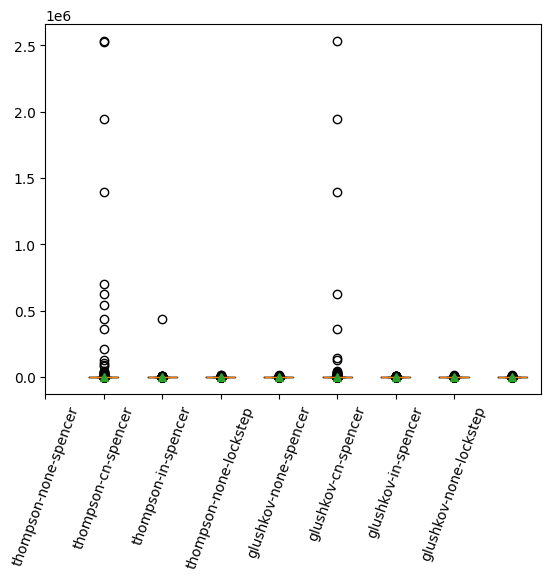

In [19]:
plt.boxplot(data.values(), showmeans=True)
plt.xticks(range(len(data)), data.keys(), rotation=70)
plt.show()

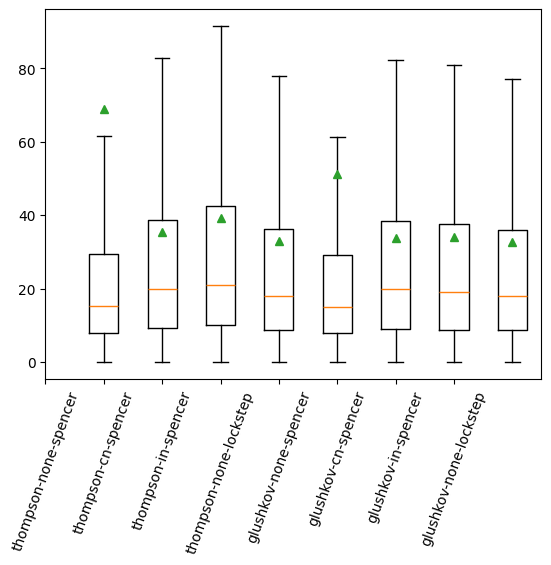

In [18]:
# Hide outliers
plt.boxplot(data.values(), showmeans=True, showfliers=False)
plt.xticks(range(len(data)), data.keys(), rotation=70)
plt.show()